**Group Assignment: CART+RF+ANN**

**Data Dictionary:**
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

**Attribute Information:**

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

**Instructions:**

1. Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.
2. Data Split: Split the data into test(30% of the data) and train(70% of the data), build classification model CART, Random Forest, Artificial Neural Network
3. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model
4. Final Model: Compare all the model and write an inference which model is best/optimized.
5. Inference: Basis on these predictions, what are the business insights and recommendations

# Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

## Data Ingestion:

In [107]:
# import necessary lobraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [2]:
# import dataset

data = pd.read_csv("insurance_part2_data.csv")

In [3]:
# check headers

print('As we may notice there are columns of mixed datatypes')
data

As we may notice there are columns of mixed datatypes


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [4]:
# check the shape of data

data.shape

(3000, 10)

## Descriptive Statistics
### Check information of data, null values and datatypes

In [5]:
# check basic information on dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### Check  duplicates

In [6]:
print('The dataset has {} duplicate values'.format(data.duplicated().sum()))

The dataset has 139 duplicate values


In [7]:
# Drop duplicate rows

data.drop_duplicates(keep='first', inplace=True)

### Check Data Summary for numerical and categorical variables

In [8]:
# study dataset decription for all variables

data.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


In [9]:
# Check description for object columns

data.describe(include='object')

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
count,2861,2861,2861,2861,2861,2861
unique,4,2,2,2,5,3
top,EPX,Travel Agency,No,Online,Customised Plan,ASIA
freq,1238,1709,1947,2815,1071,2327


In [10]:
# Check the info on final dataset

print('The new dataset has: \na.\t{} rows, {} columns, \nb.\t{} null values and,\nc.\
\t{} duplicates'.format(data.shape[0],data.shape[1],data.isnull().sum().sum(),data.duplicated().sum()))

The new dataset has: 
a.	2861 rows, 10 columns, 
b.	0 null values and,
c.	0 duplicates


### Perform EDA

In [11]:
# Compare the numbers and percentage of Claimed cases Vs Not Claimed cases

no_of_cases, per_of_cases = data.Claimed.value_counts(),data.Claimed.value_counts(normalize=True)*100

print( 'Cases in no:\n',no_of_cases,'\n\nCases in %:\n',per_of_cases)

Cases in no:
 No     1947
Yes     914
Name: Claimed, dtype: int64 

Cases in %:
 No     68.053128
Yes    31.946872
Name: Claimed, dtype: float64


In [109]:
#Seperating out the integer and object columns in 2 different lists
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

#Checking the unique values for all the categorical values
for column in cat:
    print(column,': ',data[column].nunique())
    print(data[column].value_counts().sort_values())
    print('------------------------------------------------------------------\n')

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']
['Age', 'Commision', 'Duration', 'Sales']
Agency_Code :  4
JZI     239
CWT     471
C2B     913
EPX    1238
Name: Agency_Code, dtype: int64
------------------------------------------------------------------

Type :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64
------------------------------------------------------------------

Claimed :  2
Yes     914
No     1947
Name: Claimed, dtype: int64
------------------------------------------------------------------

Channel :  2
Offline      46
Online     2815
Name: Channel, dtype: int64
------------------------------------------------------------------

Product Name :  5
Gold Plan             109
Silver Plan           421
Cancellation Plan     615
Bronze Plan           645
Customised Plan      1071
Name: Product Name, dtype: int64
------------------------------------------------------------------

Destination :  3
EUROPE       215
Americas    

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

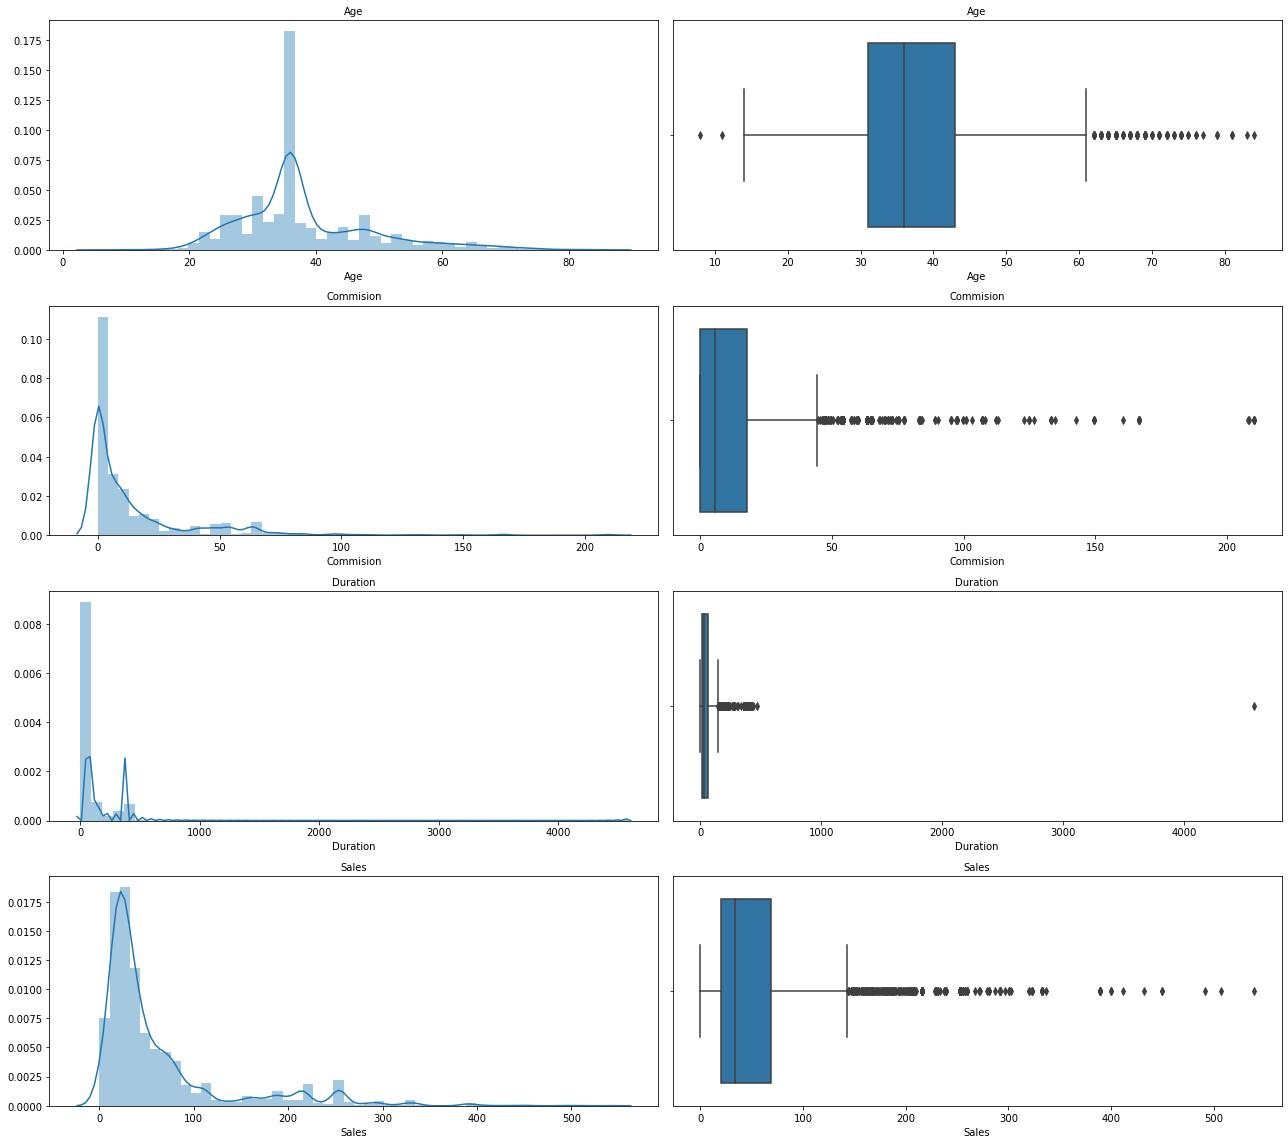

In [111]:
# For all the numerical columns, checking the overall distribution in the dataset using displot and boxplot
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(18,16)
x=0
for i in num:
    a = sns.distplot(data[i],ax=axes[x][0])
    a.set_title(i,fontsize=10)
    a = sns.boxplot(data[i],ax=axes[x][1])
    a.set_title(i,fontsize=10)
    x=x+1
    
plt.tight_layout()
plt.show()

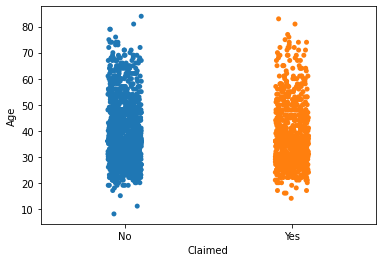

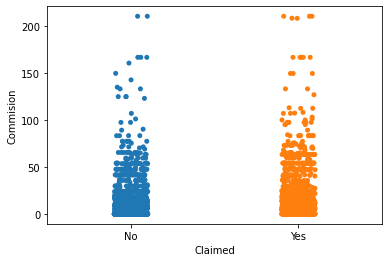

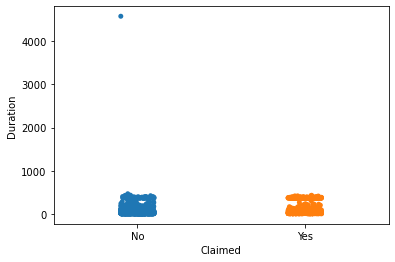

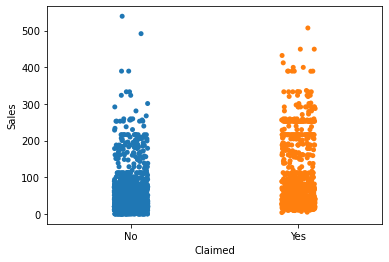

In [13]:
for var in data.select_dtypes(exclude='object').columns:
    sns.stripplot(x='Claimed',y=var, data=data)
    plt.show()

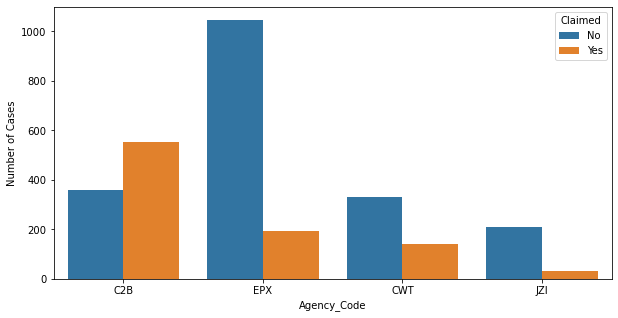

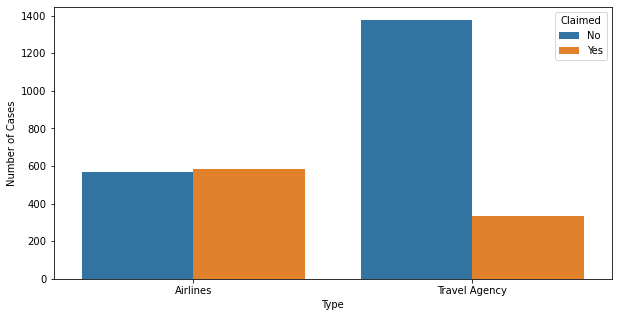

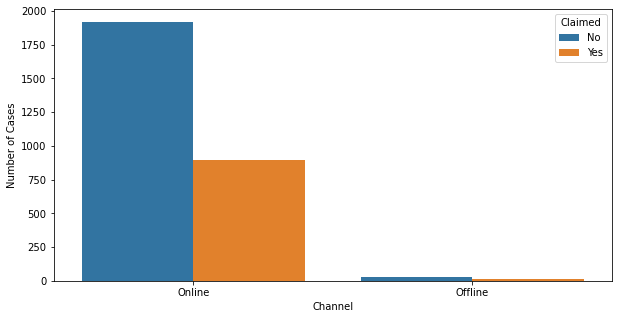

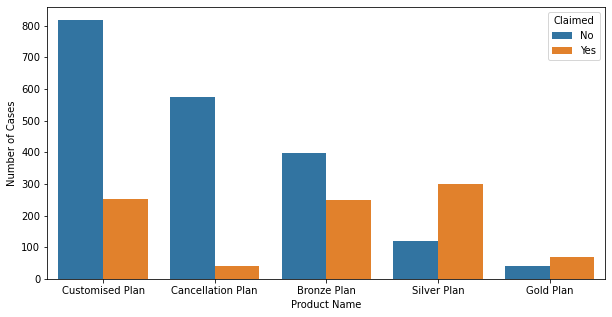

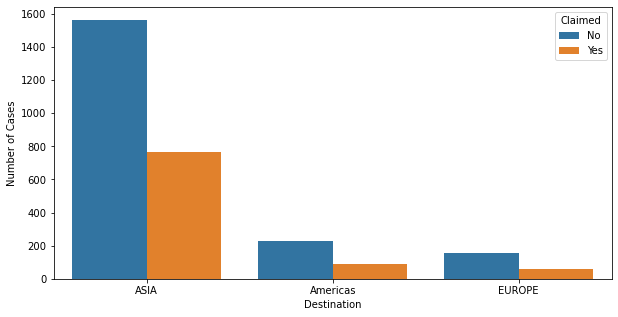

In [14]:
# compare the effect of categorical features on the target

for var in data.drop('Claimed',axis=1).select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=var,data=data, hue='Claimed')
    plt.ylabel('Number of Cases')
    plt.show()

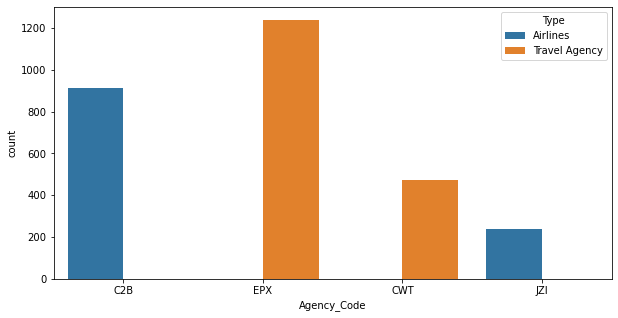

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Agency_Code', data=data, hue='Type')

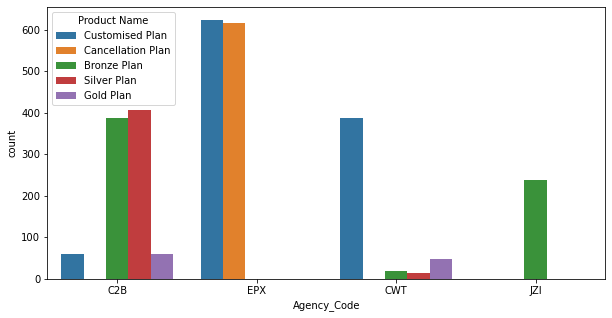

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Agency_Code', data=data, hue='Product Name')

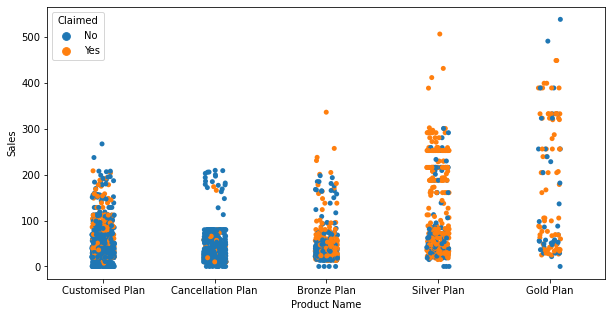

In [17]:
plt.figure(figsize=(10,5))
sns.stripplot(x='Product Name',y='Sales', data=data, hue='Claimed')

### Data transformation and pre-processing

In [18]:
df = data.copy()

In [19]:
df['Claimed'] = pd.Categorical(df['Claimed']).codes
df['Claimed']

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    0
2997    0
2998    1
2999    0
Name: Claimed, Length: 2861, dtype: int8

# Q2. Data Split: Split the data into test(30% of the data) and train(70% of the data)

## Data Split

In [20]:
# lets first split the target variable and predictor variables

X = df.drop('Claimed', axis=1)

y = df['Claimed']

In [21]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 

X = pd.get_dummies(X)
X.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,48,0.70,7,2.51,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,36,0.00,34,20.00,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,39,5.94,3,9.90,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,36,0.00,4,26.00,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
4,33,6.30,53,18.00,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size = .30, random_state = 1)

# Q2 . Build classification model CART, Random Forest, Artificial Neural Network
# Q3. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model
## CART / Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [25]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [26]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [27]:
X_train.shape

(2002, 20)

In [28]:
X_test.shape

(859, 20)

In [29]:
dt_model.score(X_train, train_labels)

0.9955044955044955

In [30]:
dt_model.score(X_test, test_labels)

0.689173457508731

In [31]:
from sklearn import tree

In [32]:
train_char_labels = ['No', "Yes"]

In [33]:
credit_tree_file = open('C:/Users/ravir/Desktop/ITP PUNE/DM/assignment/grp/credit_tree.dot','w')
dot_tree = tree.export_graphviz(dt_model, out_file=credit_tree_file,
                                feature_names=list(X_train),class_names=train_char_labels)
credit_tree_file.close()

In [34]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dt_model.feature_importances_ , columns=['imp'],index=X_train.columns).sort_values(by='imp', ascending=False))

                                     imp
Duration                        0.254222
Sales                           0.241538
Age                             0.168687
Agency_Code_C2B                 0.164117
Commision                       0.073355
Product Name_Cancellation Plan  0.014512
Product Name_Silver Plan        0.012548
Product Name_Bronze Plan        0.011049
Destination_EUROPE              0.010708
Destination_ASIA                0.010414
Product Name_Gold Plan          0.007997
Product Name_Customised Plan    0.006927
Agency_Code_CWT                 0.005209
Agency_Code_EPX                 0.004090
Type_Airlines                   0.003665
Channel_Online                  0.003266
Type_Travel Agency              0.002011
Destination_Americas            0.001977
Channel_Offline                 0.001954
Agency_Code_JZI                 0.001754


In [35]:
# first parameters

params = {'max_depth':[5,6,7,8,9], 
          'min_samples_leaf':[70,90,110], #1-3% of entire data
          'min_samples_split':[210, 270, 330]}  #3x min_sample_leaf

# trial with first set of params
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = params,
                          cv = 3)
print(grid_search.fit(X_train, train_labels))

print('\nBest params:' ,grid_search.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [70, 90, 110],
                         'min_samples_split': [210, 270, 330]})

Best params: {'max_depth': 5, 'min_samples_leaf': 70, 'min_samples_split': 210}


In [36]:
# find best params and generate classification report

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1359
           1       0.68      0.53      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       588
           1       0.68      0.54      0.60       271

    accuracy                           0.78       859
   macro avg       0.75      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



auc_train: 0.8114802875135751 , auc_test: 0.7925295579486407 
accuracy_test: 0.7764842840512224 , accuracy_train: (0.7677322677322678,)


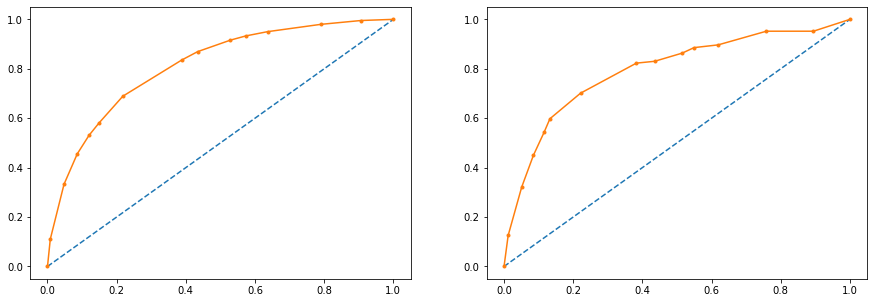

In [37]:
# predict auc for train and test

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels),
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_test:', acc_test,', accuracy_train:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [38]:
# second parameters
params = {'max_depth':[3,4,5,6,7,8], 
          'min_samples_leaf':[60,70,90,110], 
          'min_samples_split':[180,210,270,330]}  #3x min_sample_leaf

# trial with first set of params
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = params,
                          cv = 3)
print(grid_search.fit(X_train, train_labels))

print('\nBest params:' ,grid_search.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [60, 70, 90, 110],
                         'min_samples_split': [180, 210, 270, 330]})

Best params: {'max_depth': 3, 'min_samples_leaf': 60, 'min_samples_split': 180}


In [39]:
# find best params and generate classification report

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



auc_train: 0.7879341341691871 , auc_test: 0.7880519366418154 
accuracy_test: 0.7823050058207218 , accuracy_train: (0.7642357642357642,)


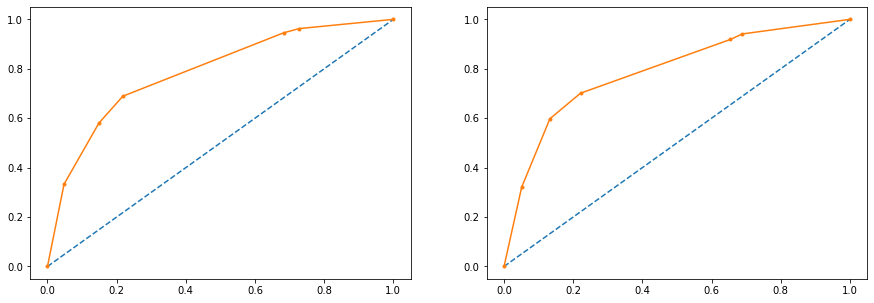

In [40]:
# predict auc for train and test

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels),
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_test:', acc_test,', accuracy_train:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [41]:
# third trial

params = {'max_depth':[2,3,4,5,6,7], 
          'min_samples_leaf':[50,60,70,90,110], 
          'min_samples_split':[150,180,210,270,330]} 

#
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = params,
                          cv = 3)
print(grid_search.fit(X_train, train_labels))

print('\nBest params:' ,grid_search.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [50, 60, 70, 90, 110],
                         'min_samples_split': [150, 180, 210, 270, 330]})

Best params: {'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 150}


In [42]:
# find best params and generate classification report

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1359
           1       0.64      0.63      0.64       643

    accuracy                           0.77      2002
   macro avg       0.73      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       588
           1       0.65      0.62      0.63       271

    accuracy                           0.77       859
   macro avg       0.74      0.73      0.74       859
weighted avg       0.77      0.77      0.77       859



auc_train: 0.7895889050246213 , auc_test: 0.78357745312147 
accuracy_test: 0.7741559953434226 , accuracy_train: (0.7687312687312687,)


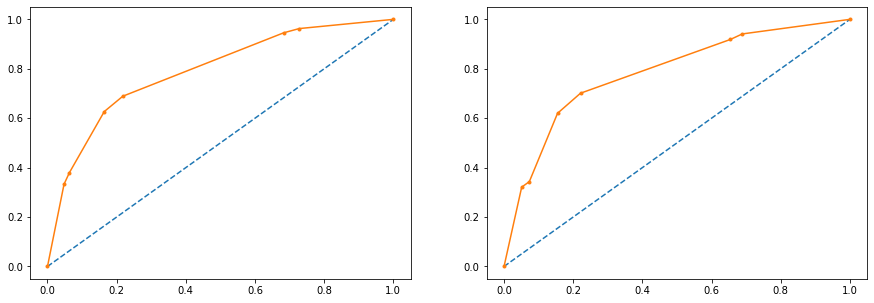

In [43]:
# predict auc for train and test

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels),
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_test:', acc_test,', accuracy_train:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [44]:
confusion_matrix(train_labels, ytrain_predict)

array([[1136,  223],
       [ 240,  403]], dtype=int64)

In [45]:
confusion_matrix(test_labels, ytest_predict)

array([[497,  91],
       [103, 168]], dtype=int64)

In [46]:
# fourth parameters

params = {'max_depth':[2,3,4,5,6,7], 
          'min_samples_leaf':[40,50,70,90,110], 
          'min_samples_split':[120,150,210,270,330]}

# trial with first set of params
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = params,
                          cv = 3)
print(grid_search.fit(X_train, train_labels))

print('\nBest params:' ,grid_search.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [40, 50, 70, 90, 110],
                         'min_samples_split': [120, 150, 210, 270, 330]})

Best params: {'max_depth': 3, 'min_samples_leaf': 40, 'min_samples_split': 120}


In [47]:
# find best params and generate classification report

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))
print()

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

[[1142  217]
 [ 245  398]]

[[500  88]
 [101 170]]

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1359
           1       0.65      0.62      0.63       643

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       588
           1       0.66      0.63      0.64       271

    accuracy                           0.78       859
   macro avg       0.75      0.74      0.74       859
weighted avg       0.78      0.78      0.78       859



auc_train: 0.7898681333017484 , auc_test: 0.7861818158997916 
accuracy_test: 0.779976717112922 , accuracy_train: (0.7692307692307693,)


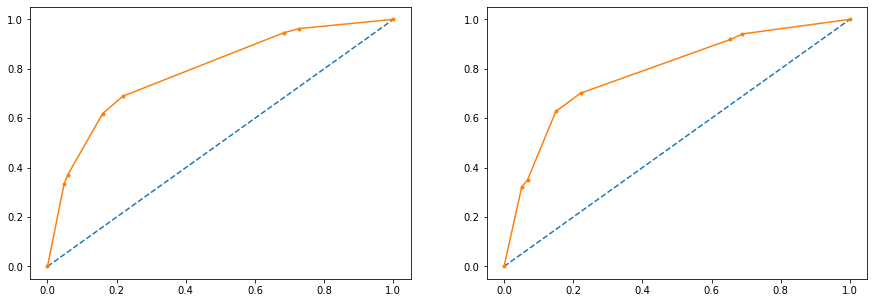

In [48]:
# predict auc for train and test

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels),
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_test:', acc_test,', accuracy_train:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [49]:
# fifth parameters

params = {'max_depth':[4,5,6,7,8,9], 
          'min_samples_leaf':[5,10,30,40,70,90], 
          'min_samples_split':[15,30,90,120,210,270]}

# trial with fifth set of params
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = params,
                          cv = 3)
print(grid_search.fit(X_train, train_labels))

print('\nBest params:' ,grid_search.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 30, 40, 70, 90],
                         'min_samples_split': [15, 30, 90, 120, 210, 270]})

Best params: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 15}


In [50]:
# Run model with best parameters and generate classification report

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84      1359
           1       0.69      0.58      0.63       643

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.77      0.78      0.78      2002

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.58      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.77      0.78      0.78       859



auc_train: 0.8171443873399731 , auc_test: 0.8029721113537666 
accuracy_train: 0.7811408614668219 , accuracy_test: (0.7812187812187812,)


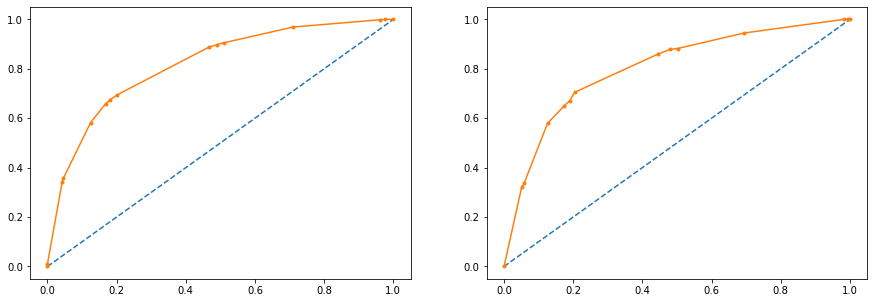

In [51]:
# predict auc for train and test

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels),
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

## Random Forest Classifier Model

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfcl = RandomForestClassifier(n_estimators=501,
                              oob_score=True,
                              max_depth=15,
                              max_features=6,
                              min_samples_leaf=5,
                              min_samples_split=10)
rfcl = rfcl.fit(X_train, train_labels)

In [67]:
rfcl.oob_score_

0.7682317682317682

In [68]:
# first set of params

params = {
    'max_depth':[7,9],
    'max_features':[2,6],
    'min_samples_leaf':[5,10, 15],
    'min_samples_split':[20,30],
    'n_estimators':[100, 300],
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfcl, param_grid=params, cv=3)

grid_search.fit(X_train, train_labels)

print('\nBest Params:',grid_search.best_params_)


Best Params: {'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}


In [69]:
# applying best params to run model

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

[[1227  132]
 [ 246  397]]

[[517  71]
 [118 153]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1359
           1       0.75      0.62      0.68       643

    accuracy                           0.81      2002
   macro avg       0.79      0.76      0.77      2002
weighted avg       0.81      0.81      0.81      2002

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       588
           1       0.68      0.56      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.77       859



auc_train: 0.8752547671934239 , auc_test: 0.8205813690789969 
accuracy_train: 0.779976717112922 , accuracy_test: 0.8111888111888111


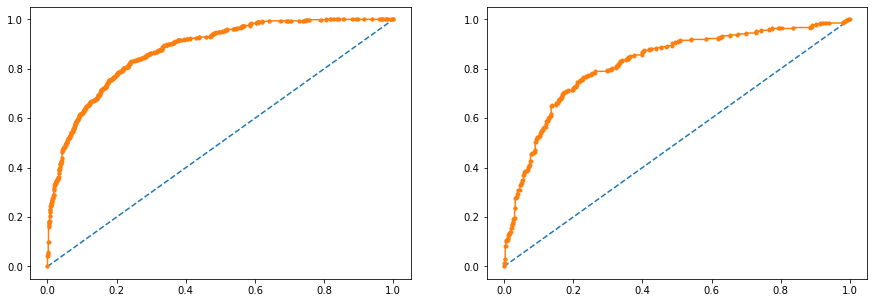

In [70]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test,'\naccuracy_train:',acc_test,', accuracy_test:',acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [71]:
# second set of params

params = {
    'max_depth':[8,10],
    'max_features':[5,7],
    'min_samples_leaf':[6,12],
    'min_samples_split':[18,36],
    'n_estimators':[75,150],
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfcl, param_grid=params, cv=3)

grid_search.fit(X_train, train_labels)

print('\nBest Params:',grid_search.best_params_)


Best Params: {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 18, 'n_estimators': 150}


In [72]:
# applying best params to run model

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

[[1223  136]
 [ 257  386]]

[[520  68]
 [123 148]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.74      0.60      0.66       643

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       588
           1       0.69      0.55      0.61       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.77       859



auc_train: 0.8636879646890667 , auc_test: 0.821569771820167 
accuracy_train: 0.7776484284051223 , accuracy_test: 0.8036963036963037


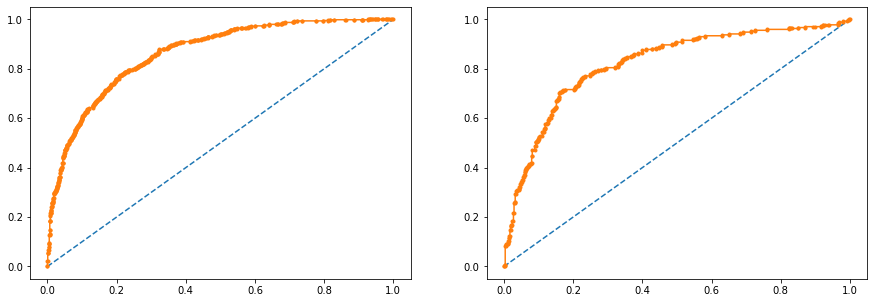

In [73]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [74]:
# third set params

params = {
    'max_depth':[6,9],
    'max_features':[3,6],
    'min_samples_leaf':[5,13],
    'min_samples_split':[15,39],
    'n_estimators':[125,175],
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfcl, param_grid=params, cv=3)

grid_search.fit(X_train, train_labels)

print('\nBest Params:',grid_search.best_params_)


Best Params: {'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 175}


In [75]:
# applying best params to run model

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

[[1231  128]
 [ 238  405]]

[[518  70]
 [114 157]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1359
           1       0.76      0.63      0.69       643

    accuracy                           0.82      2002
   macro avg       0.80      0.77      0.78      2002
weighted avg       0.81      0.82      0.81      2002

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.69      0.58      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



auc_train: 0.8825129858314537 , auc_test: 0.8205531290006778 
accuracy_train: 0.7857974388824214 , accuracy_test: 0.8171828171828172


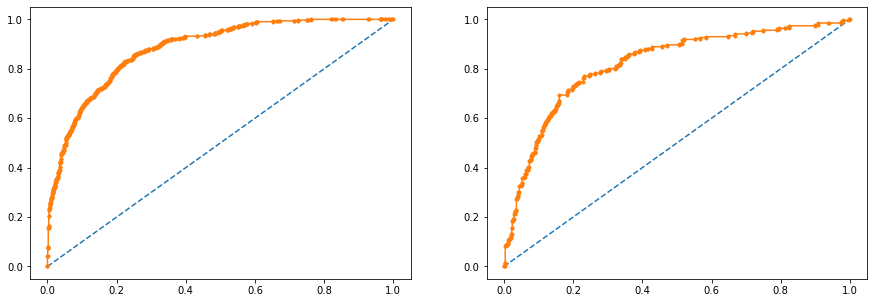

In [76]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [79]:
# fourth set params

params = {
    'max_depth':[8,10],
    'max_features':[5,6,7],
    'min_samples_leaf':[4,6],
    'min_samples_split':[35,40],
    'n_estimators':[120,150],
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfcl, param_grid=params, cv=3)

grid_search.fit(X_train, train_labels)

print('\nBest Params:',grid_search.best_params_)


Best Params: {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 40, 'n_estimators': 120}


In [80]:
# applying best params to run model

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

[[1225  134]
 [ 257  386]]

[[522  66]
 [115 156]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.74      0.60      0.66       643

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.58      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



auc_train: 0.8664133013365194 , auc_test: 0.8190218891984838 
accuracy_train: 0.789289871944121 , accuracy_test: 0.8046953046953047


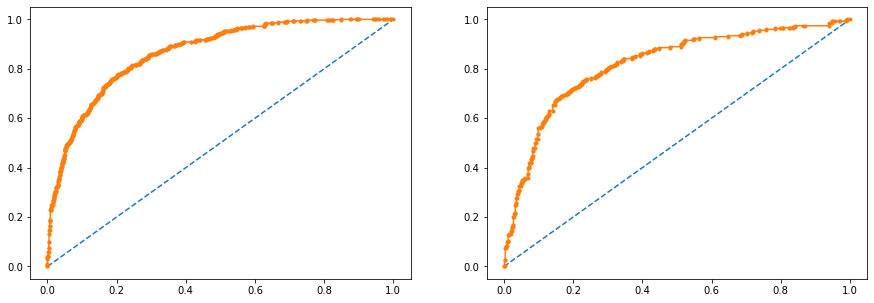

In [81]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [82]:
# fifth set params

params = {
    'max_depth':[7,8,9],
    'max_features':[4,5],
    'min_samples_leaf':[6,7,8],
    'min_samples_split':[32,35,37],
    'n_estimators':[123,127],
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfcl, param_grid=params, cv=3)

grid_search.fit(X_train, train_labels)

print('\nBest Params:',grid_search.best_params_)


Best Params: {'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 35, 'n_estimators': 127}


In [83]:
# applying best params to run model

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))

[[1224  135]
 [ 265  378]]

[[521  67]
 [125 146]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1359
           1       0.74      0.59      0.65       643

    accuracy                           0.80      2002
   macro avg       0.78      0.74      0.76      2002
weighted avg       0.79      0.80      0.79      2002

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       588
           1       0.69      0.54      0.60       271

    accuracy                           0.78       859
   macro avg       0.75      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



auc_train: 0.8565882424296523 , auc_test: 0.8209484900971459 
accuracy_train: 0.7764842840512224 , accuracy_test: 0.8001998001998002


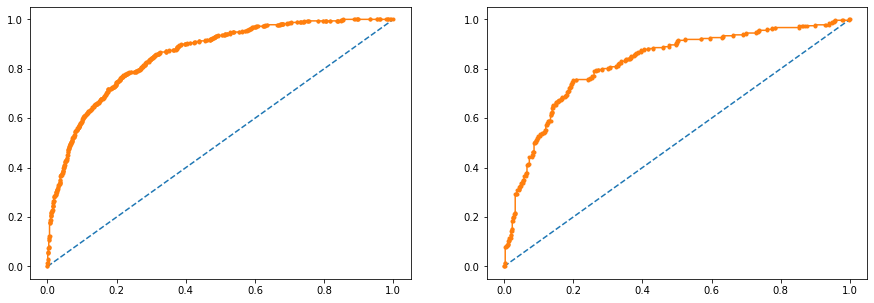

In [84]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

## ANN Model

In [85]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [86]:
sc = StandardScaler()

In [87]:
X_train = sc.fit_transform(X_train)
X_train

array([[ 2.88764239, -0.35678995, -0.44821512, ...,  0.48008911,
        -0.35226069, -0.28867513],
       [-0.21666128, -0.58804207, -0.29832684, ...,  0.48008911,
        -0.35226069, -0.28867513],
       [ 2.04101412,  1.01453513, -0.44140202, ..., -2.08294663,
         2.83880671, -0.28867513],
       ...,
       [-0.21666128, -0.58804207, -0.39371029, ...,  0.48008911,
        -0.35226069, -0.28867513],
       [-0.21666128, -0.58804207, -0.43458892, ...,  0.48008911,
        -0.35226069, -0.28867513],
       [-0.21666128, -0.58804207, -0.48228064, ..., -2.08294663,
         2.83880671, -0.28867513]])

In [88]:
X_test = sc.transform(X_test)
X_test

array([[-0.68701032, -0.58804207,  2.24296096, ...,  0.48008911,
        -0.35226069, -0.28867513],
       [ 2.79357258, -0.58804207, -0.08712061, ...,  0.48008911,
        -0.35226069, -0.28867513],
       [ 0.34775757,  0.22134035, -0.42096271, ...,  0.48008911,
        -0.35226069, -0.28867513],
       ...,
       [ 1.19438584, -0.43387399, -0.46184133, ...,  0.48008911,
        -0.35226069, -0.28867513],
       [ 1.38252546, -0.58804207, -0.4073365 , ...,  0.48008911,
        -0.35226069, -0.28867513],
       [-0.21666128, -0.58804207, -0.16887786, ...,  0.48008911,
        -0.35226069, -0.28867513]])

In [89]:
# First run

params = {'hidden_layer_sizes':[100],
          'max_iter':[10000],
          'solver':['sgd','adam'],
          'activation':['relu','logistic'],
          'tol':[0.001]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'logistic', 'hidden_layer_sizes': 100, 'max_iter': 10000, 'solver': 'adam', 'tol': 0.001}
[[1168  191]
 [ 287  356]]

[[516  72]
 [123 148]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1359
           1       0.65      0.55      0.60       643

    accuracy                           0.76      2002
   macro avg       0.73      0.71      0.71      2002
weighted avg       0.75      0.76      0.76      2002

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       588
           1       0.67      0.55      0.60       271

    accuracy                           0.77       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.76      0.77      0.77       859



auc_train: 0.7983302377903431 , auc_test: 0.808707985039034 
accuracy_train: 0.7729918509895227 , accuracy_test: 0.7612387612387612


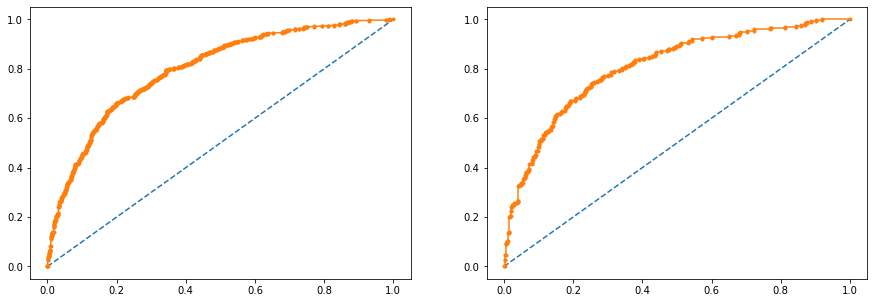

In [90]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [91]:
# Second Run

params = {'hidden_layer_sizes':[(100,100,100)],
          'max_iter':[10000],
          'solver':['sgd','adam'],
          'activation':['relu','logistic'],
          'tol':[0.001]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100), 'max_iter': 10000, 'solver': 'adam', 'tol': 0.001}
[[1104  255]
 [ 239  404]]

[[490  98]
 [ 97 174]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1359
           1       0.61      0.63      0.62       643

    accuracy                           0.75      2002
   macro avg       0.72      0.72      0.72      2002
weighted avg       0.75      0.75      0.75      2002

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       588
           1       0.64      0.64      0.64       271

    accuracy                           0.77       859
   macro avg       0.74      0.74      0.74       859
weighted avg       0.77      0.77      0.77       859



auc_train: 0.7988635180245286 , auc_test: 0.8078607826894595 
accuracy_train: 0.7729918509895227 , accuracy_test: 0.7532467532467533


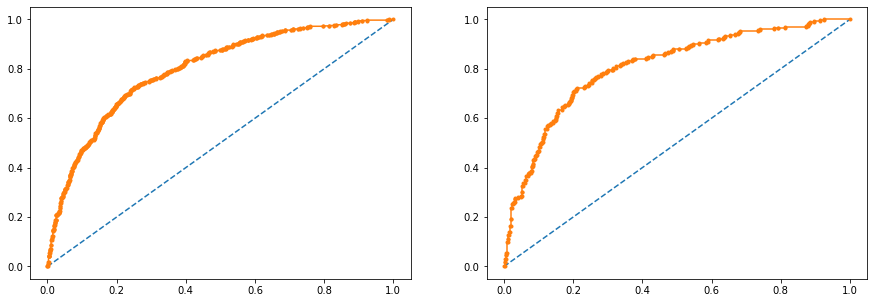

In [92]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [93]:
# Third Run

params = {'hidden_layer_sizes':[500],
          'max_iter':[15000],
          'solver':['sgd','adam'],
          'activation':['relu','logistic'],
          'tol':[0.001]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'relu', 'hidden_layer_sizes': 500, 'max_iter': 15000, 'solver': 'adam', 'tol': 0.001}
[[1155  204]
 [ 262  381]]

[[497  91]
 [108 163]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1359
           1       0.65      0.59      0.62       643

    accuracy                           0.77      2002
   macro avg       0.73      0.72      0.73      2002
weighted avg       0.76      0.77      0.76      2002

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       588
           1       0.64      0.60      0.62       271

    accuracy                           0.77       859
   macro avg       0.73      0.72      0.73       859
weighted avg       0.76      0.77      0.77       859



auc_train: 0.8099903071167734 , auc_test: 0.811268418806637 
accuracy_train: 0.7683352735739232 , accuracy_test: 0.7672327672327672


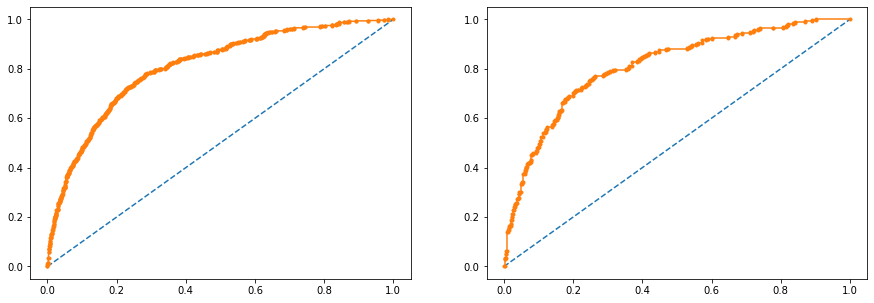

In [94]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [95]:
#Fourth run

params = {'hidden_layer_sizes':[(1000)],
          'max_iter':[15000],
          'solver':['sgd','adam'],
          'activation':['relu'],
          'tol':[0.001]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'relu', 'hidden_layer_sizes': 1000, 'max_iter': 15000, 'solver': 'sgd', 'tol': 0.001}
[[1231  128]
 [ 346  297]]

[[539  49]
 [150 121]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1359
           1       0.70      0.46      0.56       643

    accuracy                           0.76      2002
   macro avg       0.74      0.68      0.70      2002
weighted avg       0.75      0.76      0.75      2002

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       588
           1       0.71      0.45      0.55       271

    accuracy                           0.77       859
   macro avg       0.75      0.68      0.70       859
weighted avg       0.76      0.77      0.75       859



auc_train: 0.7961788068026415 , auc_test: 0.8049802947009062 
accuracy_train: 0.7683352735739232 , accuracy_test: 0.7632367632367633


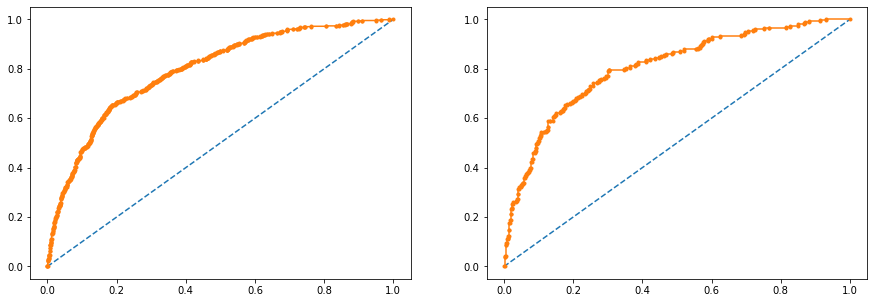

In [96]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [97]:
# Fifth run
params = {'hidden_layer_sizes':[(200,200,200)],
          'max_iter':[5000],
          'solver':['sgd','adam'],
          'activation':['relu'],
          'tol':[0.01]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'relu', 'hidden_layer_sizes': (200, 200, 200), 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}
[[1209  150]
 [ 299  344]]

[[515  73]
 [135 136]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.70      0.53      0.61       643

    accuracy                           0.78      2002
   macro avg       0.75      0.71      0.72      2002
weighted avg       0.77      0.78      0.77      2002

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       588
           1       0.65      0.50      0.57       271

    accuracy                           0.76       859
   macro avg       0.72      0.69      0.70       859
weighted avg       0.75      0.76      0.75       859



auc_train: 0.8122618978138944 , auc_test: 0.7968471521449909 
accuracy_train: 0.7578579743888242 , accuracy_test: 0.7757242757242757


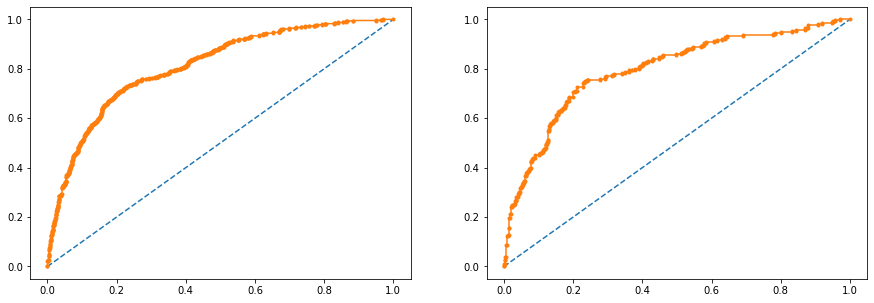

In [98]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [99]:
# Sixth run

params = {'hidden_layer_sizes':[(500,500,500)],
          'max_iter':[5000],
          'solver':['sgd','adam'],
          'activation':['relu'],
          'tol':[0.01]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'relu', 'hidden_layer_sizes': (500, 500, 500), 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}
[[1152  207]
 [ 249  394]]

[[503  85]
 [101 170]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1359
           1       0.66      0.61      0.63       643

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       588
           1       0.67      0.63      0.65       271

    accuracy                           0.78       859
   macro avg       0.75      0.74      0.75       859
weighted avg       0.78      0.78      0.78       859



auc_train: 0.8207657721062394 , auc_test: 0.813326806737455 
accuracy_train: 0.7834691501746216 , accuracy_test: 0.7722277722277723


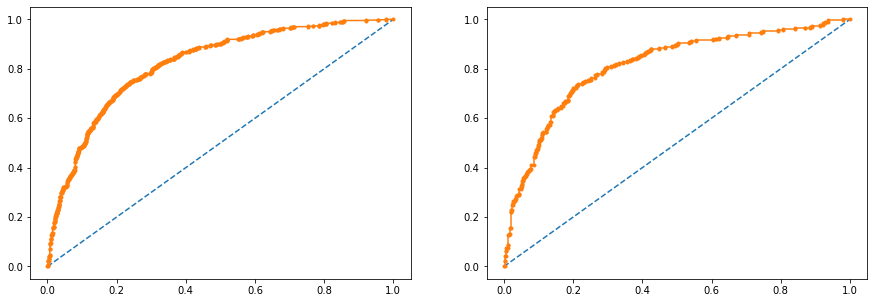

In [100]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [101]:
#Seventh Run

params = {'hidden_layer_sizes':[(250,250,250)],
          'max_iter':[5000],
          'solver':['sgd','adam'],
          'activation':['relu'],
          'tol':[0.01]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'relu', 'hidden_layer_sizes': (250, 250, 250), 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}
[[1128  231]
 [ 220  423]]

[[482 106]
 [ 92 179]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1359
           1       0.65      0.66      0.65       643

    accuracy                           0.77      2002
   macro avg       0.74      0.74      0.74      2002
weighted avg       0.78      0.77      0.78      2002

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       588
           1       0.63      0.66      0.64       271

    accuracy                           0.77       859
   macro avg       0.73      0.74      0.74       859
weighted avg       0.77      0.77      0.77       859



auc_train: 0.8222237099138626 , auc_test: 0.8112433165147978 
accuracy_train: 0.7694994179278231 , accuracy_test: 0.7747252747252747


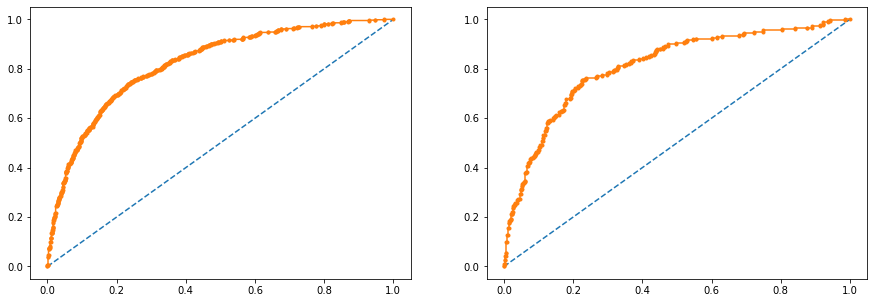

In [102]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [103]:
# Eighth run

params = {'hidden_layer_sizes':[(300,300,300)],
          'max_iter':[5000],
          'solver':['sgd','adam'],
          'activation':['relu'],
          'tol':[0.01]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'relu', 'hidden_layer_sizes': (300, 300, 300), 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}
[[1164  195]
 [ 248  395]]

[[495  93]
 [106 165]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1359
           1       0.67      0.61      0.64       643

    accuracy                           0.78      2002
   macro avg       0.75      0.74      0.74      2002
weighted avg       0.77      0.78      0.78      2002

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       588
           1       0.64      0.61      0.62       271

    accuracy                           0.77       859
   macro avg       0.73      0.73      0.73       859
weighted avg       0.77      0.77      0.77       859



auc_train: 0.8254497120172298 , auc_test: 0.8087393629038331 
accuracy_train: 0.7683352735739232 , accuracy_test: 0.7787212787212787


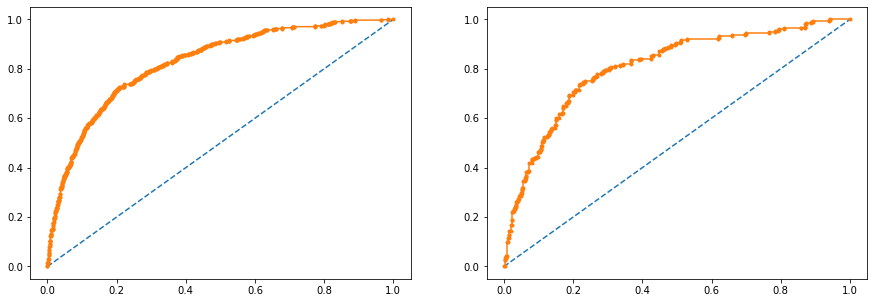

In [104]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()

In [105]:
# Ninth run

params = {'hidden_layer_sizes':[(400,400,400)],
          'max_iter':[5000],
          'solver':['sgd','adam'],
          'activation':['relu'],
          'tol':[0.01]}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator=mlp, param_grid=params, cv=3)
grid_search.fit(X_train, train_labels)

print('\nBest params:',grid_search.best_params_)

grid1 = grid_search.best_estimator_

ytrain_predict = grid1.predict(X_train)
ytest_predict = grid1.predict(X_test)

print(confusion_matrix(train_labels, ytrain_predict))
print()
print(confusion_matrix(test_labels, ytest_predict))

print(classification_report(train_labels, ytrain_predict))
print(classification_report(test_labels, ytest_predict))


Best params: {'activation': 'relu', 'hidden_layer_sizes': (400, 400, 400), 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}
[[1163  196]
 [ 269  374]]

[[506  82]
 [113 158]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1359
           1       0.66      0.58      0.62       643

    accuracy                           0.77      2002
   macro avg       0.73      0.72      0.73      2002
weighted avg       0.76      0.77      0.76      2002

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       588
           1       0.66      0.58      0.62       271

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.73       859
weighted avg       0.77      0.77      0.77       859



auc_train: 0.8185010476782284 , auc_test: 0.8142116625247884 
accuracy_train: 0.7729918509895227 , accuracy_test: 0.7677322677322678


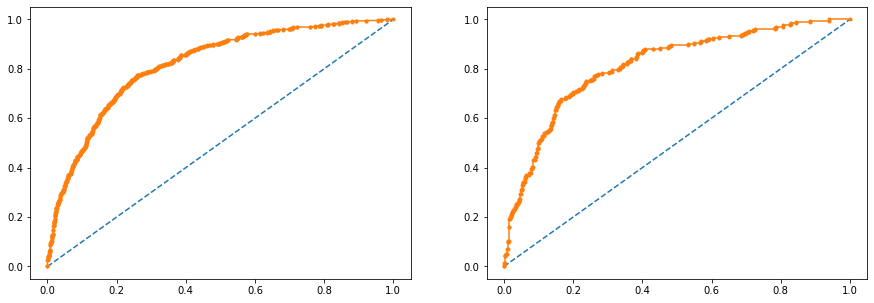

In [106]:
# Calculate Area under curve, accuracy score of model and visualise train prediction Vs test prediction 

ytrain_probs = grid1.predict_proba(X_train)
ytrain_probs = ytrain_probs[:,1]
ytest_probs = grid1.predict_proba(X_test)
ytest_probs = ytest_probs[:,1]
auc_train = roc_auc_score(train_labels, ytrain_probs)
auc_test = roc_auc_score(test_labels, ytest_probs)
acc_train = grid1.score(X_train, train_labels)
acc_test = grid1.score(X_test, test_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fpr, tpr, thresholds = roc_curve(train_labels, ytrain_probs)
ax1.plot([0,1],[0,1],linestyle = '--')
ax1.plot(fpr, tpr, marker = '.')
print('auc_train:',auc_train, ', auc_test:',auc_test, '\naccuracy_train:', acc_test,', accuracy_test:', acc_train)

fpr, tpr, thresholds = roc_curve(test_labels, ytest_probs)
ax2.plot([0,1],[0,1],linestyle = '--')
ax2.plot(fpr, tpr, marker = '.')
plt.show()